In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

данные взяты из варианта 16.
Даны данные изменения цены и числа продаж одного из товаров, представленных в интернет-магазине за 20
дней. Необходимо определить базовые показатели, вычисляемые на данных
price - стоимость -
amount - число продаж
day - временной период (день)
Сами данные записаны в коде ниже в соответствующих столбцах датафрейма

In [348]:
df = pd.DataFrame({'day': [i for i in range(1, 21)],  # дни с 1 по 20
                   'price': [1.81, 1.81, 3.78, 3.78, 3.78, 3.78, 3.78, 3.89, 3.93, 3.28, 3.23, 3.21, 3.35, 3.35, 3.37,
                             3.40, 3.25, 3.25, 3.25, 3.29],  # стоимость
                   'amount': [28, 21, 3, 0, 27, 14, 10, 2, 2, 8, 15, 10, 17, 9, 2, 33, 1, 12, 10, 4]})  # число продаж

#df = pd.DataFrame({'day': [i for i in range(1, 21)],  # дни с 1 по 20
#                   'price': [4.1, 4.1, 4.37, 4.37, 4.37, 4.37, 4.37, 4.55, 4.61, 4.39, 4.33, 4.31, 4.49, 4.49, 4.53,
#                             4.57, 4.38, 4.38, 4.38, 4.42],  # стоимость
#                   'amount': [20, 34, 16, 16, 25, 47, 41, 26, 29, 17, 75, 42, 46, 58, 7, 18, 27, 88, 61,
#                              31]})  # число продаж
df

,day,price,amount
0,1,1.81,28
1,2,1.81,21
2,3,3.78,3
3,4,3.78,0
4,5,3.78,27
5,6,3.78,14
6,7,3.78,10
7,8,3.89,2
8,9,3.93,2
9,10,3.28,8


Для начала удалим все выбросы

Для этого необходимо найти данные, меньше 25 квантиля - IQR и большие 75-го квантиля - IQR. Также необходимо построить box-plot диаграмму

In [349]:
# Создаем DataFrame с квантилями для цены
local_data = df["price"]
quantiles = [5, 25, 50, 75, 95]
quantile_values = [round(pd.Series(local_data).quantile(q/100), 2) for q in quantiles]
iqr = quantile_values[3] - quantile_values[1]

quantile_values.append(iqr)
quantile_index = [f'{q}%' for q in quantiles] + ["IQR"]

quant_price = pd.DataFrame(data={'Prices': quantile_values}, index=quantile_index)

quant_price

,Prices
5%,1.81
25%,3.25
50%,3.35
75%,3.78
95%,3.89
IQR,0.53


In [350]:
# Создаем DataFrame с квантилями для количества продаж
local_data = df["amount"]
quantiles = [5, 25, 50, 75, 95]
quantile_values = [int(round(pd.Series(local_data).quantile(q/100), 0)) for q in quantiles]
iqr = quantile_values[3] - quantile_values[1]

quantile_values.append(iqr)
quantile_index = [f'{q}%' for q in quantiles] + ["IQR"]

quant_price = pd.DataFrame(data={'Prices': quantile_values}, index=quantile_index)

quant_price

,Prices
5%,1
25%,3
50%,10
75%,16
95%,28
IQR,13


Под множеством экстремальных значений (выбросов) будем понимать значения,
удовлетворяющие неравенствам $x < Q_25 − 1.5 * IQR и x > Q_75 + 1.5 * IQR$. Если такие значения удается обнаружить, то максимальные и минимальные значения выбираются без их учёта.


In [351]:
series = df["price"]
iqr = series.quantile(0.75) - series.quantile(0.25)
q25_minus_iqr = series.quantile(0.25) - iqr
q75_plus_iqr = series.quantile(0.75) + iqr
min_price = series.min()
max_price = series.max()

# Создаем DataFrame для статистических значений
emis_data = {
    '25th Quantile - IQR': q25_minus_iqr,
    '75th Quantile + IQR': q75_plus_iqr,
    'Min': min_price,
    'Max': max_price
}

emis_price = pd.DataFrame(data=emis_data, index=['Price'])
emis_price

,25th Quantile - IQR,75th Quantile + IQR,Min,Max
Price,2.72,4.31,1.81,3.93


In [352]:
series = df["amount"]
iqr = series.quantile(0.75) - series.quantile(0.25)
q25_minus_iqr = series.quantile(0.25) - iqr
q75_plus_iqr = series.quantile(0.75) + iqr
min_price = series.min()
max_price = series.max()

# Создаем DataFrame для статистических значений
emis_data = {
    '25th Quantile - IQR': q25_minus_iqr,
    '75th Quantile + IQR': q75_plus_iqr,
    'Min': min_price,
    'Max': max_price
}

emis_price = pd.DataFrame(data=emis_data, index=['Price'])
emis_price

,25th Quantile - IQR,75th Quantile + IQR,Min,Max
Price,-10.0,28.25,0,33


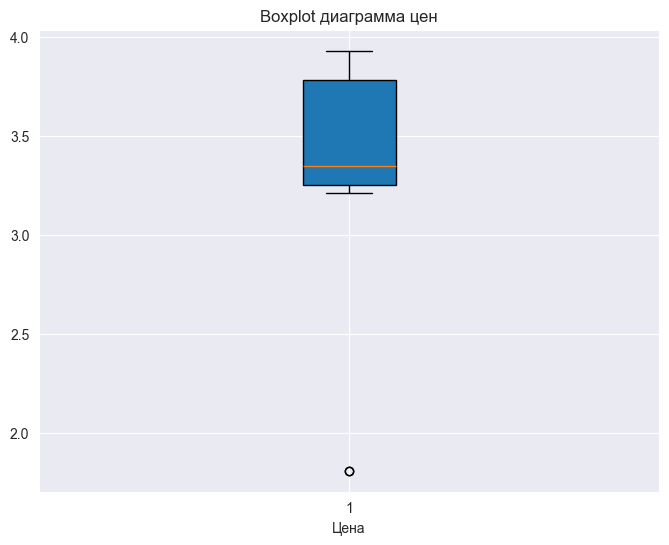

In [353]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["price"], vert=True, patch_artist=True, showfliers=True, whis=1.5)

# Настройка заголовка и осей
plt.title('Boxplot диаграмма цен')
plt.xlabel('Цена')

# Отображение графика
plt.show()

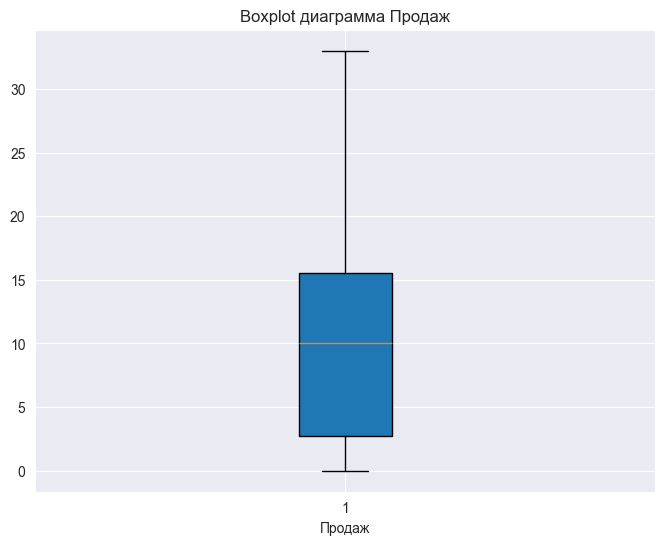

In [354]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["amount"], vert=True, patch_artist=True, showfliers=True, whis=1.5)

# Настройка заголовка и осей
plt.title('Boxplot диаграмма Продаж')
plt.xlabel('Продаж')

# Отображение графика
plt.show()

Количество продаж 33 это выброс. Цена 1.81 также будет выбросом. Следовательно это измерение нужно удалить и повторить поиск выбросов

In [355]:
df = df[df.amount != 33]
df = df[df.price != 1.81]
df

,day,price,amount
2,3,3.78,3
3,4,3.78,0
4,5,3.78,27
5,6,3.78,14
6,7,3.78,10
7,8,3.89,2
8,9,3.93,2
9,10,3.28,8
10,11,3.23,15
11,12,3.21,10


Теперь ещё раз повторим поиск выбросов

In [356]:
series = df["price"]
iqr = series.quantile(0.75) - series.quantile(0.25)
q25_minus_iqr = series.quantile(0.25) - iqr
q75_plus_iqr = series.quantile(0.75) + iqr
min_price = series.min()
max_price = series.max()

# Создаем DataFrame для статистических значений
emis_data = {
    '25th Quantile - IQR': q25_minus_iqr,
    '75th Quantile + IQR': q75_plus_iqr,
    'Min': min_price,
    'Max': max_price
}

emis_price = pd.DataFrame(data=emis_data, index=['Price'])
emis_price

,25th Quantile - IQR,75th Quantile + IQR,Min,Max
Price,2.72,4.31,3.21,3.93


In [357]:
series = df["amount"]
iqr = series.quantile(0.75) - series.quantile(0.25)
q25_minus_iqr = series.quantile(0.25) - iqr
q75_plus_iqr = series.quantile(0.75) + iqr
min_price = series.min()
max_price = series.max()

# Создаем DataFrame для статистических значений
emis_data = {
    '25th Quantile - IQR': q25_minus_iqr,
    '75th Quantile + IQR': q75_plus_iqr,
    'Min': min_price,
    'Max': max_price
}

emis_price = pd.DataFrame(data=emis_data, index=['Price'])
emis_price

,25th Quantile - IQR,75th Quantile + IQR,Min,Max
Price,-8.0,22.0,0,27


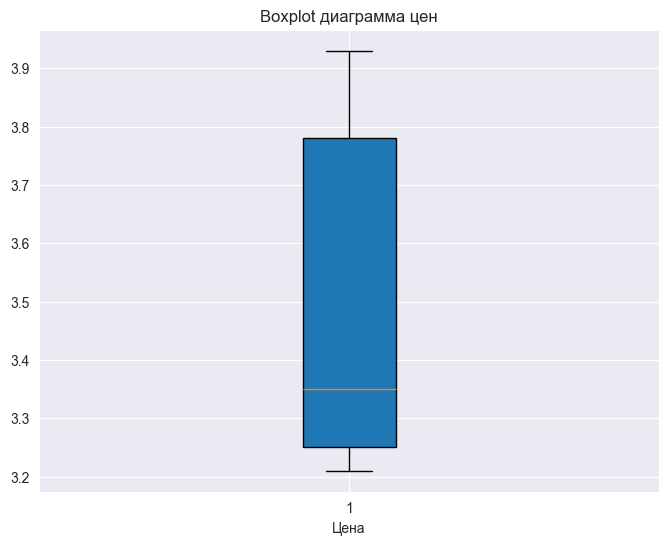

In [358]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["price"], vert=True, patch_artist=True, showfliers=True, whis=1.5)

# Настройка заголовка и осей
plt.title('Boxplot диаграмма цен')
plt.xlabel('Цена')

# Отображение графика
plt.show()

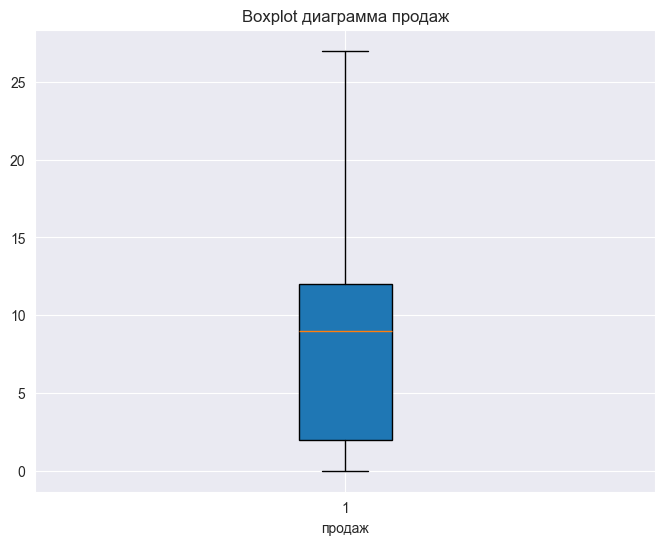

In [359]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["amount"], vert=True, patch_artist=True, showfliers=True, whis=1.5)

# Настройка заголовка и осей
plt.title('Boxplot диаграмма продаж')
plt.xlabel('продаж')

# Отображение графика
plt.show()

В данном случае max количество продаж равно 27 опять станет выбросом. Повторим всё ещё раз

In [360]:
df = df[df.amount != 27]

In [361]:
# Создаем DataFrame с квантилями для цены
series = df["price"]
iqr = series.quantile(0.75) - series.quantile(0.25)
q25_minus_iqr = series.quantile(0.25) - iqr
q75_plus_iqr = series.quantile(0.75) + iqr
min_price = series.min()
max_price = series.max()

# Создаем DataFrame для статистических значений
emis_data = {
    '25th Quantile - IQR': q25_minus_iqr,
    '75th Quantile + IQR': q75_plus_iqr,
    'Min': min_price,
    'Max': max_price
}

emis_price = pd.DataFrame(data=emis_data, index=['Price'])
emis_price

,25th Quantile - IQR,75th Quantile + IQR,Min,Max
Price,2.72,4.31,3.21,3.93


In [362]:
series = df["amount"]
iqr = series.quantile(0.75) - series.quantile(0.25)
q25_minus_iqr = series.quantile(0.25) - iqr
q75_plus_iqr = series.quantile(0.75) + iqr
min_price = series.min()
max_price = series.max()

# Создаем DataFrame для статистических значений
emis_data = {
    '25th Quantile - IQR': q25_minus_iqr,
    '75th Quantile + IQR': q75_plus_iqr,
    'Min': min_price,
    'Max': max_price
}

emis_price = pd.DataFrame(data=emis_data, index=['Price'])
emis_price

,25th Quantile - IQR,75th Quantile + IQR,Min,Max
Price,-6.5,19.0,0,17


В результате мы имеем выборку без выбросов
Построим box-plot диаграмму итоговой выборки

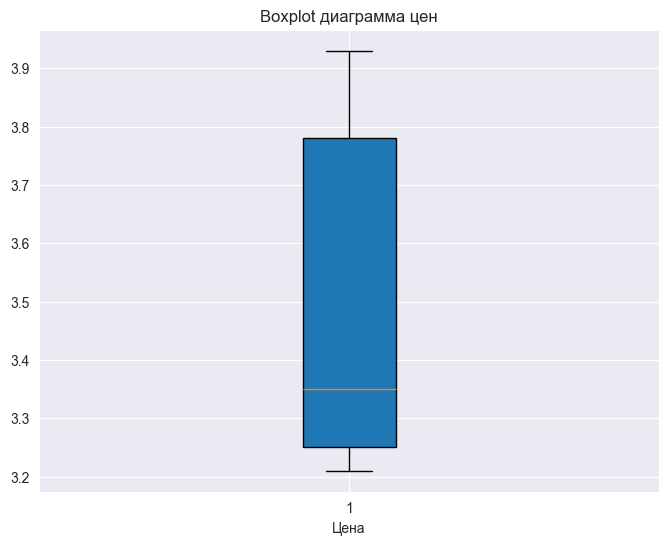

In [363]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["price"], vert=True, patch_artist=True, showfliers=True, whis=1.5)

# Настройка заголовка и осей
plt.title('Boxplot диаграмма цен')
plt.xlabel('Цена')

# Отображение графика
plt.show()

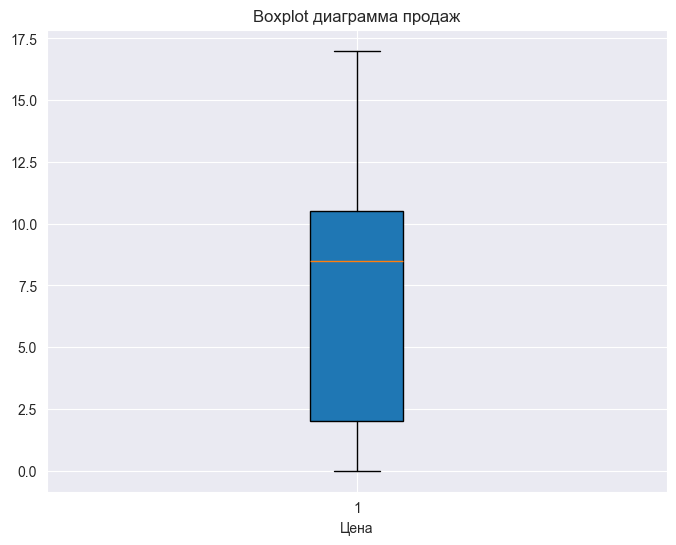

In [364]:
plt.figure(figsize=(8, 6))
plt.boxplot(df["amount"], vert=True, patch_artist=True, showfliers=True, whis=1.5)

# Настройка заголовка и осей
plt.title('Boxplot диаграмма продаж')
plt.xlabel('Цена')

# Отображение графика
plt.show()

Построим вариационный ряд
Вариационный ряд–это ряд (выборка), упорядоченный по возрастанию значений

In [365]:
var_ser = pd.DataFrame(np.sort(df, axis=0), columns=df.columns)
var_ser = var_ser.astype({"day": "int64", "amount": "int64"})
var_ser

,day,price,amount
0,3,3.21,0
1,4,3.23,1
2,6,3.25,2
3,7,3.25,2
4,8,3.25,2
5,9,3.28,3
6,10,3.29,4
7,11,3.35,8
8,12,3.35,9
9,13,3.37,10


Построим частотную таблицу для цены и количества продаж
Частотную таблицу (дискретный ряд) получим если для каждого уникального
значения $p_i$ указать его относительную частоту $p_i = \frac{n(i)}{n}$
 , где $n_i$ – количество
значений $p_i$ в выборке, $n$ – объем выборки. В нашем случае $n = 20$
Для начала найдём уникальные значения

In [366]:
unique_prices = df["price"].unique()
unique_prices.sort()
unique_prices

array([3.21, 3.23, 3.25, 3.28, 3.29, 3.35, 3.37, 3.78, 3.89, 3.93])

In [367]:
unique_amount = df["amount"].unique()
unique_amount.sort()
unique_amount

array([ 0,  1,  2,  3,  4,  8,  9, 10, 12, 14, 15, 17], dtype=int64)

Теперь посчитаем количество этих уникальных значений

In [368]:
quntity_table_price = pd.DataFrame({'price': unique_prices,
                       "n": [df['price'].value_counts()[i] for i in unique_prices],
                       "p": [(df['price'].value_counts()[i] / len(df['price'])) for i in unique_prices]
                       })

quntity_table_price

,price,n,p
0,3.21,1,0.0625
1,3.23,1,0.0625
2,3.25,3,0.1875
3,3.28,1,0.0625
4,3.29,1,0.0625
5,3.35,2,0.1250
6,3.37,1,0.0625
7,3.78,4,0.2500
8,3.89,1,0.0625
9,3.93,1,0.0625


In [369]:
quntity_table_amount = pd.DataFrame({'amount': unique_amount,
                        "n": [df['amount'].value_counts()[i] for i in unique_amount],
                        "p": [(df['amount'].value_counts()[i] / len(df['amount'])) for i in unique_amount]})
quntity_table_amount

,amount,n,p
0,0,1,0.0625
1,1,1,0.0625
2,2,3,0.1875
3,3,1,0.0625
4,4,1,0.0625
5,8,1,0.0625
6,9,1,0.0625
7,10,3,0.1875
8,12,1,0.0625
9,14,1,0.0625


Построим интервальный ряд по формуле Стёрджиса
Интервальный ряд получаем, когда диапазон значений разбиваем на интервалы, и для каждого интервала определяем его
относительную частоту (частоту значений, которые попадают в рассматриваемый диапазон в статистической выборке).
Определяем количество интервалов по формуле Стёрджиса
k=1+(3,32⋅log 𝑛)
$h = \frac{x(max) - x(min)}{1 + 3.32*lg(n)}$

Количество интервалов

In [370]:
k = round(1 + (3.32 * np.log10(len(df))))
k

5

Ширина интервала цен

In [371]:
h_price = ((max(unique_prices) - min(unique_prices)) / k).round(2)
h_price

0.14

Ширина интервала количества продаж

In [372]:
h_amount = int(((max(unique_amount) - min(unique_amount)) / k).round(0))
h_amount

3

Теперь построим интервальный ряд в виде таблицы, где
* левая граница первого интервала = минимальный элемент выборки (левые границы всегда включаются в интервал).
* правая граница последнего интервала = максимальный элемент (она всегда включается в интервал, а все остальные
правые границы – нет).
* правая граница интервала определяется как левая граница +ℎ (в качестве альтернативных способов определения
количества интервалов можно рассмотреть правила Скотта и Фридмана-Дьякониса)

В pandas DataFrame могут быть записаны только с включением всех левых границ, и без включения правых, кроме последней.
Но сути ряда это менять не должно

In [373]:
# параметры
unique = unique_prices
h = h_price
round_num = 2
groups = [round(unique[0], round_num)] + [round(unique[0] + i * h, round_num) for i in range(1,k)] + [unique[-1]]

interval_ser_price = df.groupby(pd.cut(df.price, groups, include_lowest = True), observed=False).count()
interval_ser_price = interval_ser_price.drop(columns=["day", "amount"])
interval_ser_price["p(i)"] = [row.price / interval_ser_price["price"].sum() for row in interval_ser_price.itertuples()] # change inline
interval_ser_price


,price,p(i)
price,,
"(3.209, 3.35]",9,0.5625
"(3.35, 3.49]",1,0.0625
"(3.49, 3.63]",0,0.0000
"(3.63, 3.77]",0,0.0000
"(3.77, 3.93]",6,0.3750


In [374]:
# параметры
unique = unique_amount
h = h_amount
round_num = 0

# отрезки должны быть типа float, так что убрать дробные нули не получится
groups = [round(unique[0], round_num)] + [round(unique[0] + i * h, round_num) for i in range(1,k)] + [unique[-1]]

interval_ser_amount = df.groupby(pd.cut(df.amount, groups, include_lowest = True), observed=False).count() # change inline
interval_ser_amount = interval_ser_amount.drop(columns=["day", "price"]) # change inline
interval_ser_amount["p(i)"] = [row.amount / interval_ser_amount["amount"].sum() for row in interval_ser_amount.itertuples()] # change inline
interval_ser_amount


,amount,p(i)
amount,,
"(-0.001, 3.0]",6,0.3750
"(3.0, 6.0]",1,0.0625
"(6.0, 9.0]",2,0.1250
"(9.0, 12.0]",4,0.2500
"(12.0, 17.0]",3,0.1875


Полигон частот по частотной таблице

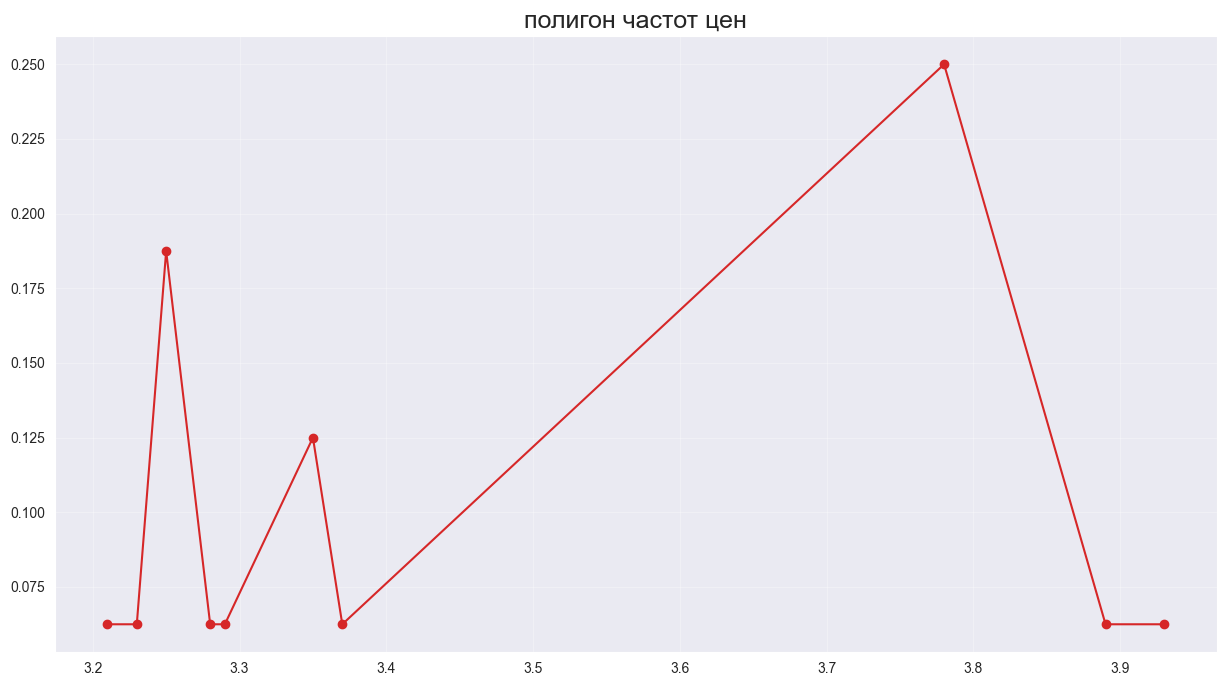

In [375]:
# Рисуем график
plt.figure(figsize=(15, 8), dpi=100)
plt.plot(quntity_table_price['price'], quntity_table_price['p'], linestyle='-', color='tab:red')

# Добавляем точки для каждого значения цены
plt.scatter(quntity_table_price['price'], quntity_table_price['p'], color='tab:red', label='p')

# Обозначение
plt.title("полигон частот цен", fontsize=18)
plt.grid(axis='both', alpha=.3)
plt.show()

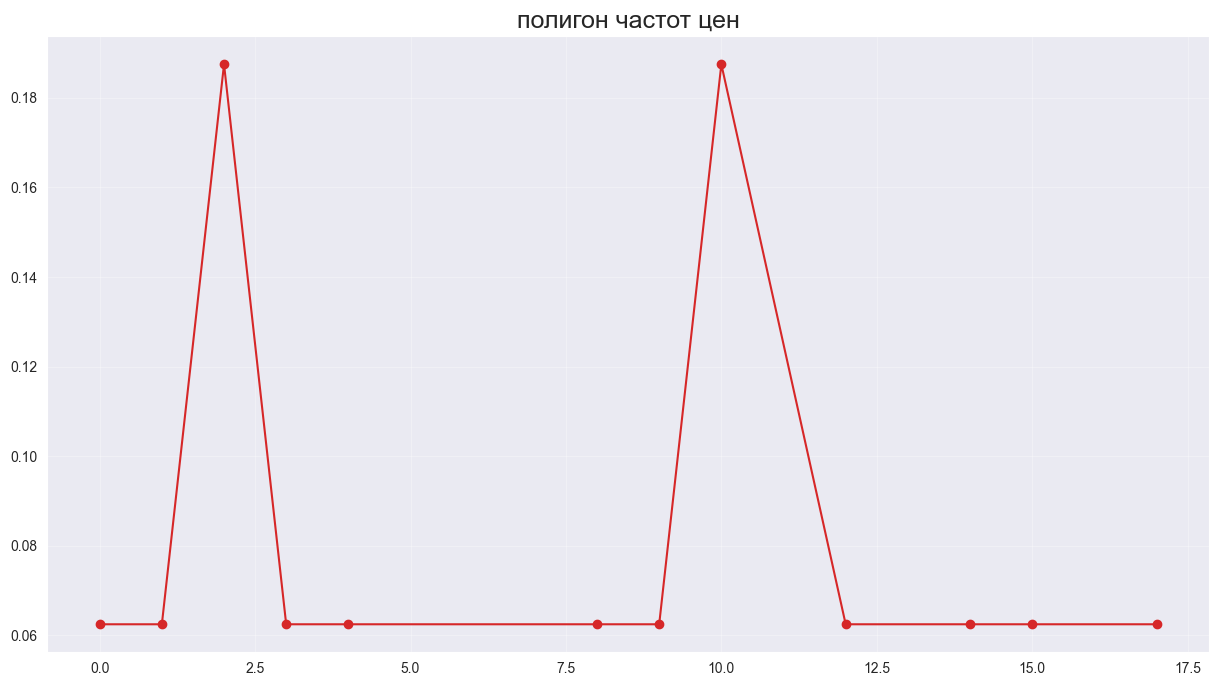

In [376]:
# Рисуем график
plt.figure(figsize=(15, 8), dpi=100)
plt.plot(quntity_table_amount['amount'], quntity_table_amount['p'], linestyle='-', color='tab:red')

# Добавляем точки для каждого значения цены
plt.scatter(quntity_table_amount['amount'], quntity_table_amount['p'], color='tab:red', label='p')

# Обозначение
plt.title("полигон частот цен", fontsize=18)
plt.grid(axis='both', alpha=.3)
plt.show()

Теперь построим гистограмму интервальных рядов для цены и количества продаж

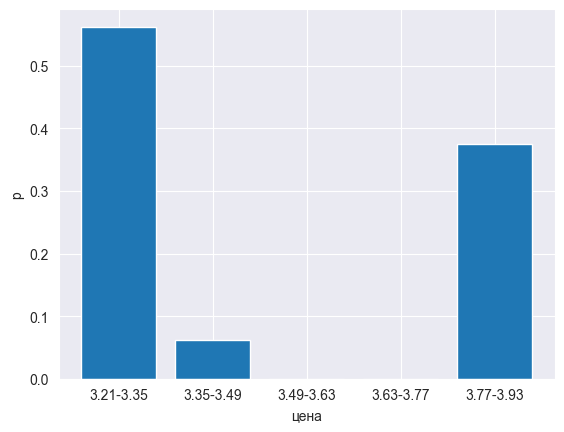

In [377]:
x = [f"{round(i.left, 2)}-{round(i.right,2)}" for i in interval_ser_price["p(i)"].index.to_list()]

y = interval_ser_price["p(i)"].values

plt.bar(x, y)
plt.xlabel('цена')
plt.ylabel('p')
plt.show()

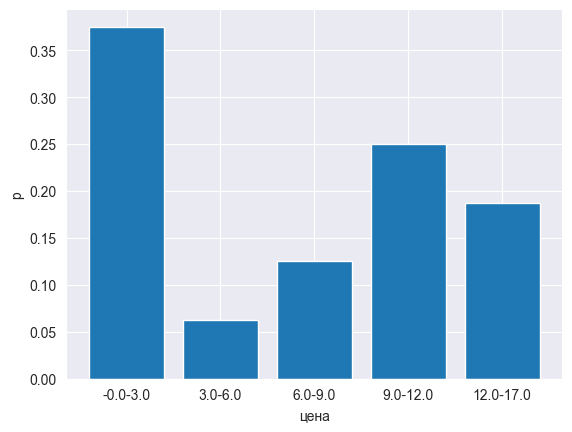

In [378]:
x = [f"{round(i.left, 2)}-{round(i.right,2)}" for i in interval_ser_amount["p(i)"].index.to_list()]

y = interval_ser_amount["p(i)"].values

plt.bar(x, y)
plt.xlabel('цена')
plt.ylabel('p')
plt.show()

Эмпирическая функция распределения (дискретная, ступенчато-образная) случайной величины - вероятность того функция будет меньше аргумента случайной величины
F(x) = P(X < x) от нуля до единицы
Эмпирическая функция распределения один из способов задания эмпирического распределения элементов выборки наряду с дискретным и интервальным статистическими рядами.
Эмпирическая функция распределения – это функция $F^*(x)$ , определяющая, с какой относительной частотой параметр x в выборке принимает значение, меньшее $x_i$
$F^*(x) = \frac {n_x_i}{n}$
где $n_x_i$ количество элементов выборки, меньших x_i, n –объем выборки.
Для построения эмпирического закона распределения на основе частотной таблицы (дискретного ряда) сделаем
заготовки для данных о цене и об объеме продаж.

In [379]:
empir_disrtr_price = pd.DataFrame({
    'F(x)': [sum(quntity_table_price['p'][0:i]) for i in range(len(quntity_table_price))],
    'price': [quntity_table_price['price'][i] for i in range(len(quntity_table_price))]
})

new_row = [1, quntity_table_price['price'][len(quntity_table_price)-1]]

empir_disrtr_price.loc[len(empir_disrtr_price)] = new_row

empir_disrtr_price

,F(x),price
0,0.0000,3.21
1,0.0625,3.23
2,0.1250,3.25
3,0.3125,3.28
4,0.3750,3.29
5,0.4375,3.35
6,0.5625,3.37
7,0.6250,3.78
8,0.8750,3.89
9,0.9375,3.93


In [380]:
empir_disrtr_amount = pd.DataFrame({
    'F(x)': [sum(quntity_table_amount['p'][0:i]) for i in range(len(quntity_table_amount))],
    'amount': [quntity_table_amount['amount'][i] for i in range(len(quntity_table_amount))]
})

new_row = [1, quntity_table_amount['amount'][len(quntity_table_amount)-1]]

empir_disrtr_amount.loc[len(empir_disrtr_amount)] = new_row

empir_disrtr_amount

,F(x),amount
0,0.0000,0
1,0.0625,1
2,0.1250,2
3,0.3125,3
4,0.3750,4
5,0.4375,8
6,0.5000,9
7,0.5625,10
8,0.7500,12
9,0.8125,14


Теперь построим график эмпирического закона распределения для цены

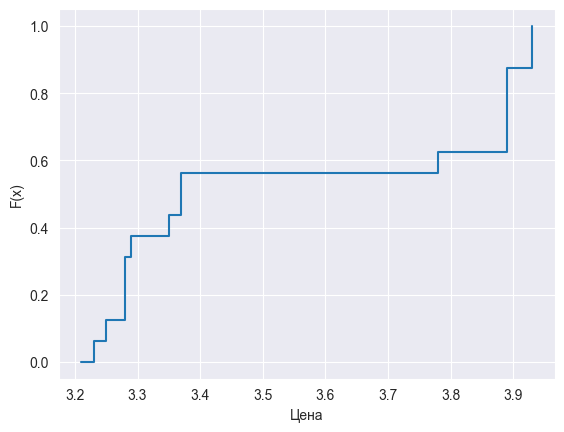

In [381]:

plt.step(empir_disrtr_price['price'], empir_disrtr_price['F(x)'], where='post')
plt.xlabel('Цена')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()


и для количества продаж

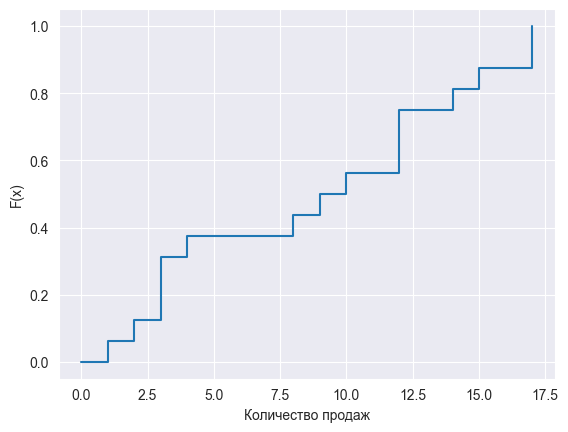

In [382]:
plt.step(empir_disrtr_amount['amount'], empir_disrtr_amount['F(x)'], where='post')
plt.xlabel('Количество продаж')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()
